C:\Users\Adrina\AppData\Local\Temp\ipykernel_4244\3249364308.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Energy Consumption (kWh)'].interpolate(method='linear', inplace=True)  # fill missing


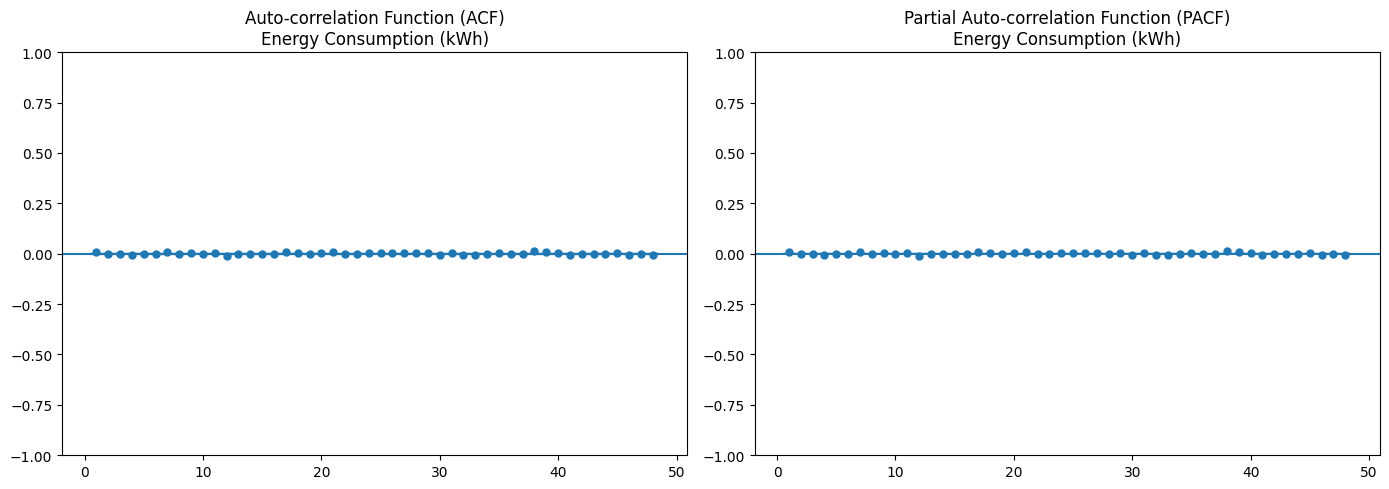

In [ ]:
################################AFC-Auto Function Correlation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ============================= بارگذاری داده =============================
df = pd.read_csv("D:/third semester/Casystudy2/2-Dataset/electricity_consumption-2.csv")

# ============================= تبدیل فرمت تاریخ =============================
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
df.dropna(subset=['Timestamp'], inplace=True)

# ============================= پاک‌سازی داده‌ها =============================
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

# ============================= مرتب‌سازی =============================
df.sort_values('Timestamp', inplace=True)
df.reset_index(drop=True, inplace=True)

# ============================= تنظیم ایندکس =============================
df.set_index('Timestamp', inplace=True)
df = df.asfreq('h')  # hourly frequency
df['Energy Consumption (kWh)'].interpolate(method='linear', inplace=True)  # fill missing

# ============================= ACF & PACF Plots =============================
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plot_acf(df['Energy Consumption (kWh)'], lags=48, zero=False, ax=plt.gca())
plt.title("Auto-correlation Function (ACF)\nEnergy Consumption (kWh)")

plt.subplot(1,2,2)
plot_pacf(df['Energy Consumption (kWh)'], lags=48, zero=False, method='ywm', ax=plt.gca())
plt.title("Partial Auto-correlation Function (PACF)\nEnergy Consumption (kWh)")

plt.tight_layout()
plt.show()



===== Mutual Information Scores =====
Room-Level Energy Consumption (kWh)    0.006878
Equipment Age (years)                  0.003990
Reactive Power (kVARh)                 0.003726
Water Usage (liters)                   0.003533
Zonal Heating/Cooling Data (kWh)       0.003219
Energy Savings Target (per)            0.002876
Carbon Emission Rate (CO2/kWh)         0.002792
Temperature (C)                        0.002706
Building Size (mA)                     0.002704
Voltage Levels (V)                     0.002262
IoT Sensor Count                       0.002221
Power Outage Indicator                 0.001869
Local Energy Production (kWh).1        0.001666
Local Energy Production (kWh)          0.001666
Lighting Consumption (kWh)             0.001329
HVAC Consumption (kWh)                 0.001183
Solar Irradiance (W/mA)                0.000692
Electric Vehicle Charging Status       0.000644
Maintenance Status                     0.000583
Insulation Quality Score               0.000361
T

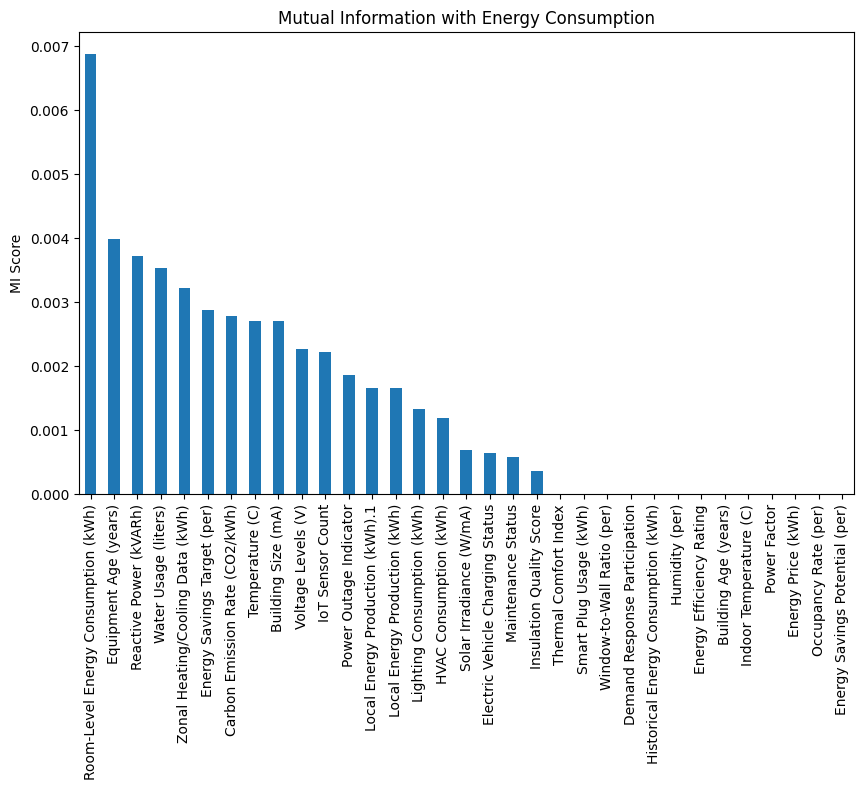

In [2]:
#########################################Mutual Information-MI
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression


# ============================= بارگذاری داده =============================
df = pd.read_csv("D:/third semester/Casystudy2/2-Dataset/electricity_consumption-2.csv")

# ============================= تبدیل فرمت تاریخ =============================
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
df.dropna(subset=['Timestamp'], inplace=True)

# ============================= پاک‌سازی داده‌ها =============================
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

# ============================= مرتب‌سازی =============================
df.sort_values('Timestamp', inplace=True)
df.reset_index(drop=True, inplace=True)

categorical_cols = [
    'Building Type',
    'Occupancy Schedule',
    'Building Orientation',
    'Peak Demand Reduction Indicator',
    'Carbon Emission Reduction Category'
]

df = pd.get_dummies(df, columns=categorical_cols)

# Drop target column and any non-numeric columns (like Timestamp)
X_num = df.drop(columns=['Energy Consumption (kWh)'])
X_num = X_num.select_dtypes(include=[np.number])  # keep only numeric features
y_num = df['Energy Consumption (kWh)']

mi_scores = mutual_info_regression(X_num, y_num, random_state=42)
mi_scores = pd.Series(mi_scores, index=X_num.columns).sort_values(ascending=False)

print("\n===== Mutual Information Scores =====")
print(mi_scores)

plt.figure(figsize=(10,6))
mi_scores.plot(kind='bar')
plt.title("Mutual Information with Energy Consumption")
plt.ylabel("MI Score")
plt.show()


In [1]:
################################################3Variance Threshold

import pandas as pd
import numpy as np
from sklearn.feature_selection import VarianceThreshold

# ============================= Load Dataset =============================
df = pd.read_csv("D:/third semester/Casystudy2/2-Dataset/electricity_consumption-1.csv")

# ============================= Preprocessing =============================
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
df.dropna(subset=['Timestamp'], inplace=True)
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

# حذف مقادیر منفی انرژی
df = df[df['Energy Consumption (kWh)'] >= 0]

# جدا کردن X و y
X = df.drop(columns=['Energy Consumption (kWh)', 'Timestamp'])
y = df['Energy Consumption (kWh)']

# تبدیل categorical به عددی
X = pd.get_dummies(X, drop_first=True)

# ============================= Variance Threshold =============================
selector = VarianceThreshold(threshold=0.01)  # آستانه واریانس
selector.fit(X)

low_variance_features = X.columns[~selector.get_support()]
print("Low variance features:", list(low_variance_features))

# حذف فیچرهای با واریانس کم
X_selected = selector.transform(X)
print("Original feature count:", X.shape[1])
print("Selected feature count:", X_selected.shape[1])


Low variance features: ['Energy Price (kWh)']
Original feature count: 41
Selected feature count: 40


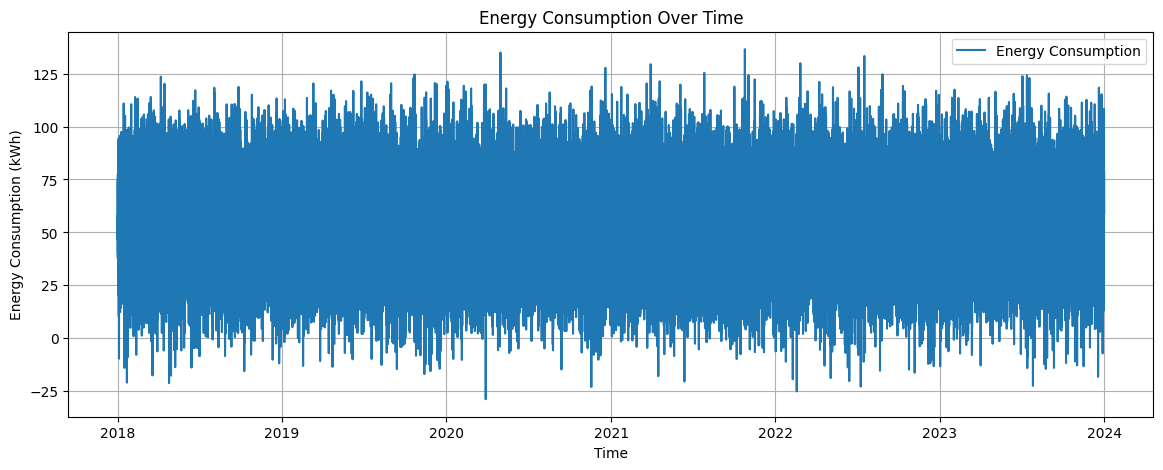

In [ ]:
# ============================= Line Plot (Time Series Plot)=============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Load and prepare dataset
df = pd.read_csv("D:/third semester/Casystudy2/2-Dataset/electricity_consumption-2.csv")
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
df.dropna(subset=['Timestamp'], inplace=True)
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df.sort_values('Timestamp', inplace=True)
df.reset_index(drop=True, inplace=True)
df.set_index('Timestamp', inplace=True)
df = df.asfreq('h')  # hourly frequency
df['Energy Consumption (kWh)'] = df['Energy Consumption (kWh)'].interpolate(method='linear')

# Prepare data for MI
categorical_cols = [
    'Building Type',
    'Occupancy Schedule',
    'Building Orientation',
    'Peak Demand Reduction Indicator',
    'Carbon Emission Reduction Category'
]
df_dummies = pd.get_dummies(df, columns=categorical_cols)
X_num = df_dummies.drop(columns=['Energy Consumption (kWh)'])
X_num = X_num.select_dtypes(include=[np.number])
y_num = df_dummies['Energy Consumption (kWh)']

plt.figure(figsize=(14,5))
plt.plot(df.index, df['Energy Consumption (kWh)'], label='Energy Consumption')
plt.title("Energy Consumption Over Time")
plt.xlabel("Time")
plt.ylabel("Energy Consumption (kWh)")
plt.legend()
plt.grid()
plt.show()

<Figure size 1400x1000 with 0 Axes>

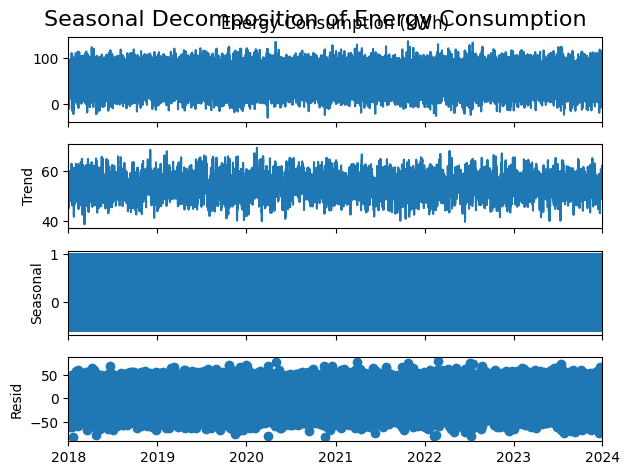

In [8]:
# ============================= Seasonal Decomposition=============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Load and prepare dataset
df = pd.read_csv("D:/third semester/Casystudy2/2-Dataset/electricity_consumption-2.csv")
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
df.dropna(subset=['Timestamp'], inplace=True)
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df.sort_values('Timestamp', inplace=True)
df.reset_index(drop=True, inplace=True)
df.set_index('Timestamp', inplace=True)
df = df.asfreq('h')  # hourly frequency
df['Energy Consumption (kWh)'] = df['Energy Consumption (kWh)'].interpolate(method='linear')

# Prepare data for MI
categorical_cols = [
    'Building Type',
    'Occupancy Schedule',
    'Building Orientation',
    'Peak Demand Reduction Indicator',
    'Carbon Emission Reduction Category'
]
df_dummies = pd.get_dummies(df, columns=categorical_cols)
X_num = df_dummies.drop(columns=['Energy Consumption (kWh)'])
X_num = X_num.select_dtypes(include=[np.number])
y_num = df_dummies['Energy Consumption (kWh)']

result = seasonal_decompose(df['Energy Consumption (kWh)'], model='additive', period=24)  # daily seasonality assumed

plt.figure(figsize=(14,10))
result.plot()
plt.suptitle('Seasonal Decomposition of Energy Consumption', fontsize=16)
plt.show()

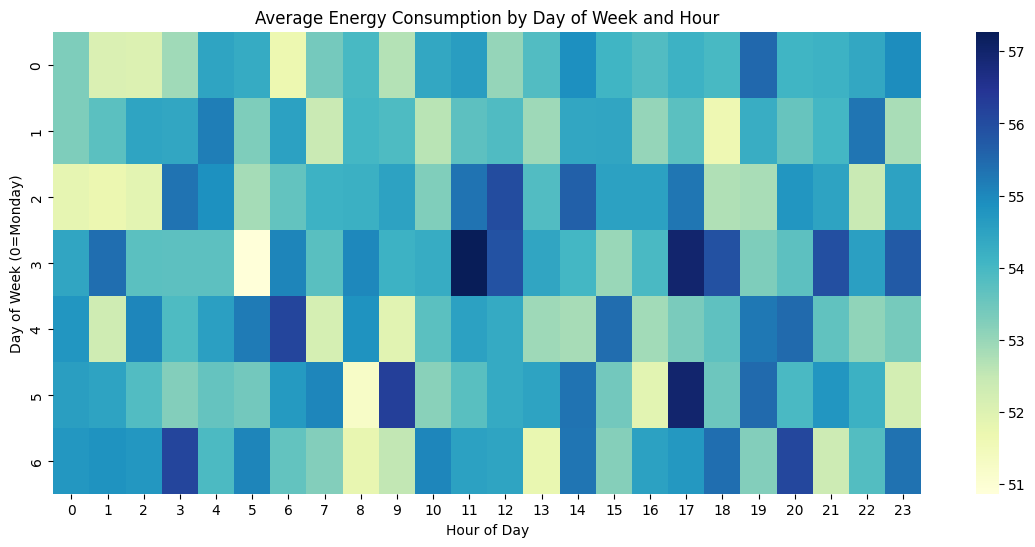

In [9]:
# ============================= Heatmap of Hourly vs Day of Week Average Energy Consumption=============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Load and prepare dataset
df = pd.read_csv("D:/third semester/Casystudy2/2-Dataset/electricity_consumption-2.csv")
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
df.dropna(subset=['Timestamp'], inplace=True)
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df.sort_values('Timestamp', inplace=True)
df.reset_index(drop=True, inplace=True)
df.set_index('Timestamp', inplace=True)
df = df.asfreq('h')  # hourly frequency
df['Energy Consumption (kWh)'] = df['Energy Consumption (kWh)'].interpolate(method='linear')

# Prepare data for MI
categorical_cols = [
    'Building Type',
    'Occupancy Schedule',
    'Building Orientation',
    'Peak Demand Reduction Indicator',
    'Carbon Emission Reduction Category'
]
df_dummies = pd.get_dummies(df, columns=categorical_cols)
X_num = df_dummies.drop(columns=['Energy Consumption (kWh)'])
X_num = X_num.select_dtypes(include=[np.number])
y_num = df_dummies['Energy Consumption (kWh)']

df['hour'] = df.index.hour
df['dayofweek'] = df.index.dayofweek

pivot_table = df.pivot_table(values='Energy Consumption (kWh)', index='dayofweek', columns='hour', aggfunc='mean')

plt.figure(figsize=(14,6))
sns.heatmap(pivot_table, cmap='YlGnBu')
plt.title('Average Energy Consumption by Day of Week and Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week (0=Monday)')
plt.show()

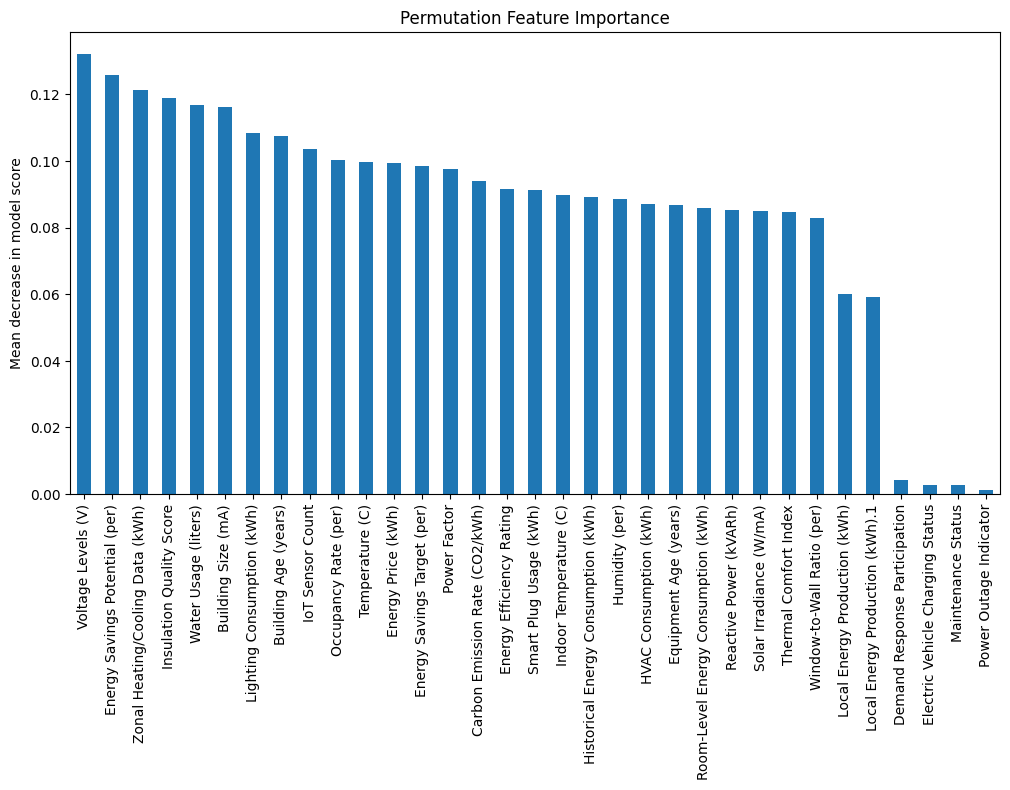

In [10]:
#########################################Permutation Feature Importance 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestRegressor


# ============================= بارگذاری داده =============================
df = pd.read_csv("D:/third semester/Casystudy2/2-Dataset/electricity_consumption-2.csv")

# ============================= تبدیل فرمت تاریخ =============================
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
df.dropna(subset=['Timestamp'], inplace=True)

# ============================= پاک‌سازی داده‌ها =============================
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

# ============================= مرتب‌سازی =============================
df.sort_values('Timestamp', inplace=True)
df.reset_index(drop=True, inplace=True)

categorical_cols = [
    'Building Type',
    'Occupancy Schedule',
    'Building Orientation',
    'Peak Demand Reduction Indicator',
    'Carbon Emission Reduction Category'
]

df = pd.get_dummies(df, columns=categorical_cols)

# Drop target column and any non-numeric columns (like Timestamp)
X_num = df.drop(columns=['Energy Consumption (kWh)'])
X_num = X_num.select_dtypes(include=[np.number])  # keep only numeric features
y_num = df['Energy Consumption (kWh)']

# Example: Fit a simple model first
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_num, y_num)

result = permutation_importance(model, X_num, y_num, n_repeats=10, random_state=42)

importances = pd.Series(result.importances_mean, index=X_num.columns).sort_values(ascending=False)

importances.plot(kind='bar', figsize=(12,6))
plt.title("Permutation Feature Importance")
plt.ylabel("Mean decrease in model score")
plt.show()